# Titanic ML Prediction - Decision Tree

This is my first competition notebook on Kaggle. Hope it will be the start of many more to come.

I will predict the survival of passengers using Decision Tree algoritm. 

NB (version 2): It still has some code snippets from v1 so it's very unorganized plus I didn't try the pruning part of Decision Tree. Hope to fix these issues in the next version.

Courtesy to @aysenurozkann 's notebook: https://www.kaggle.com/aysenurozkann/titanic-decisiontreeclassifier/notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import warnings
warnings.simplefilter("ignore")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Import train and test data**

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Planning
This is just an outline of the things I want to look at before I start working with the ML model.

* data.shape, head(), tail(), info(), describe(), value_counts()
* histogram
* missing values
* correlation between features

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
test.describe().columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
test.shape

(418, 11)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Separating Numeric and Categorical values**

In [9]:
train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# Histogram of all numeric variables

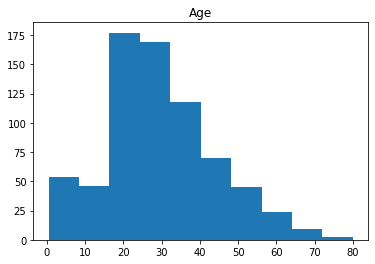

In [10]:
plt.hist(train_num['Age'], bins=10)
plt.title("Age")
plt.show()

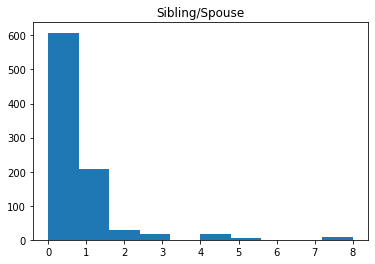

In [11]:
plt.hist(train_num['SibSp'], bins=10)
plt.title("Sibling/Spouse")
plt.show()

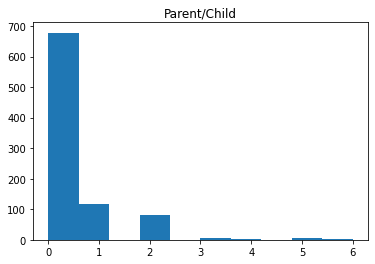

In [12]:
plt.hist(train_num['Parch'], bins=10)
plt.title("Parent/Child")
plt.show()

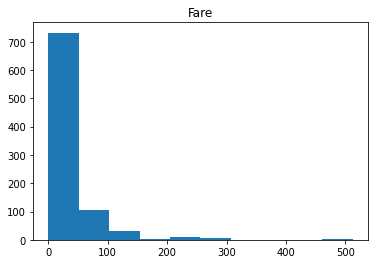

In [13]:
plt.hist(train_num['Fare'], bins=10)
plt.title("Fare")
plt.show()

**Finding correlation among numeric variables**

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

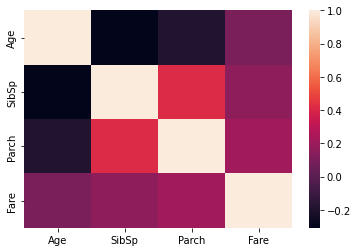

In [14]:
print(train_num.corr())
sns.heatmap(train_num.corr())

**Compare survival rate across Age, SibSp, Parch, and Fare**

In [15]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# Barplot of all categorical variables

In [16]:
train_cat["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
Survived = train_cat["Survived"].value_counts(normalize=True)

type(Survived)

pandas.core.series.Series

In [18]:
## Survived now is a pandas.series
## Must convert to dataframe

Survived = train_cat["Survived"].value_counts(normalize=True)
Survived = pd.DataFrame(Survived)

display(Survived)

,Survived
0,0.616162
1,0.383838


In [19]:
## Convert the index into a column

Survived = train_cat["Survived"].value_counts(normalize=True)
Survived = pd.DataFrame(Survived)
print(Survived.index)

Survived = Survived.reset_index()
display(Survived)

## Fixing column names

Survived = Survived.rename(columns={"index":"Survived", "Survived":"% of Survivors"})

Survived["% of Survivors"]= Survived["% of Survivors"]*100
display(Survived)

Survived["% of Survivors"]= np.round(Survived["% of Survivors"],2)
display(Survived)

Int64Index([0, 1], dtype='int64')


,index,Survived
0,0,0.616162
1,1,0.383838


,Survived,% of Survivors
0,0,61.616162
1,1,38.383838


,Survived,% of Survivors
0,0,61.62
1,1,38.38


**BarPlot for "Survived" column**

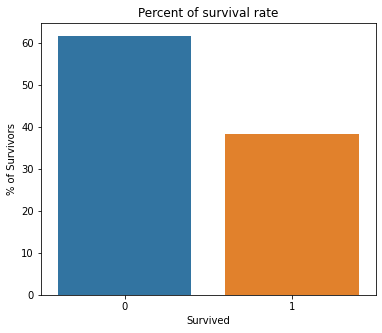

In [20]:
plt.figure(figsize = (6,5))
sns.barplot(x='Survived', y='% of Survivors', data= Survived)
plt.title("Percent of survival rate")
plt.show()

**BarPlot for "Pclass" column**

In [21]:
Pclass = train_cat["Pclass"].value_counts(normalize=True)
Pclass = pd.DataFrame(Pclass)

Pclass = Pclass.reset_index()

## Fixing column names

Pclass = Pclass.rename(columns={"index":"Class", "Pclass":"% of passengers"})

Pclass = Pclass.sort_values(by='Class')

Pclass["% of passengers"]= Pclass["% of passengers"]*100

Pclass["% of passengers"]= np.round(Pclass["% of passengers"],2)
display(Pclass)

,Class,% of passengers
1,1,24.24
2,2,20.65
0,3,55.11


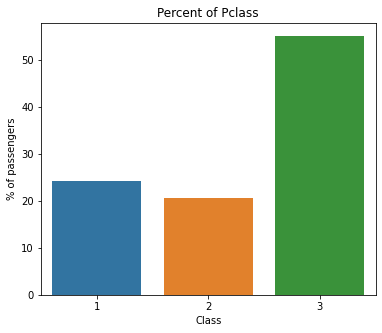

In [22]:
plt.figure(figsize = (6,5))
sns.barplot(x='Class', y='% of passengers', data= Pclass)
plt.title("Percent of Pclass")
plt.show()

**BarPlot for "Sex" column**

In [23]:
Sex = train_cat["Sex"].value_counts(normalize=True)
Sex = pd.DataFrame(Sex)

Sex = Sex.reset_index()

## Fixing column names

Sex = Sex.rename(columns={"index":"Sex", "Sex":"% of passengers"})

Sex = Sex.sort_values(by='Sex')

Sex["% of passengers"]= Sex["% of passengers"]*100

Sex["% of passengers"]= np.round(Sex["% of passengers"],2)
display(Sex)

,Sex,% of passengers
1,female,35.24
0,male,64.76


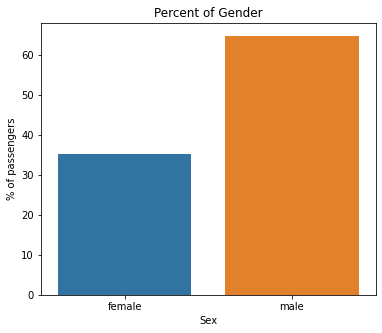

In [24]:
plt.figure(figsize = (6,5))
sns.barplot(x='Sex', y='% of passengers', data= Sex)
plt.title("Percent of Gender")
plt.show()

**BarPlot for "Ticket" column**


In [25]:
Ticket = train_cat["Ticket"].value_counts(normalize=True)
Ticket = pd.DataFrame(Ticket)

Ticket = Ticket.reset_index()

## Fixing column names

Ticket = Ticket.rename(columns={"index":"Ticket", "Ticket":"% of passengers"})

#Ticket = Ticket.sort_values(by='Ticket')

Ticket["% of passengers"]= Ticket["% of passengers"]*100

Ticket["% of passengers"]= np.round(Ticket["% of passengers"],2)
display(Ticket)

,Ticket,% of passengers
0,347082,0.79
1,CA. 2343,0.79
2,1601,0.79
3,3101295,0.67
4,CA 2144,0.67
...,...,...
676,9234,0.11
677,19988,0.11
678,2693,0.11
679,PC 17612,0.11


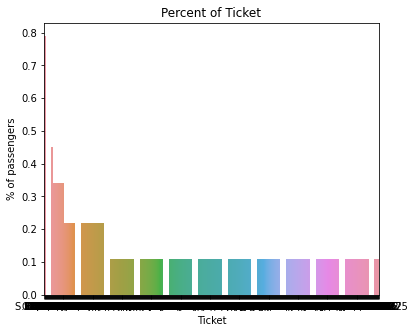

In [26]:
plt.figure(figsize = (6,5))
sns.barplot(x='Ticket', y='% of passengers', data= Ticket)
plt.title("Percent of Ticket")
plt.show()

**BarPlot for "Cabin" column**

In [27]:
Cabin = train_cat["Cabin"].value_counts(normalize=True)
Cabin = pd.DataFrame(Cabin)

Cabin = Cabin.reset_index()

## Fixing column names

Cabin = Cabin.rename(columns={"index":"Cabin", "Cabin":"% of passengers"})

Cabin["% of passengers"]= Cabin["% of passengers"]*100

Cabin["% of passengers"]= np.round(Cabin["% of passengers"],2)
display(Cabin)

,Cabin,% of passengers
0,B96 B98,1.96
1,G6,1.96
2,C23 C25 C27,1.96
3,C22 C26,1.47
4,F33,1.47
...,...,...
142,E34,0.49
143,C7,0.49
144,C54,0.49
145,E36,0.49


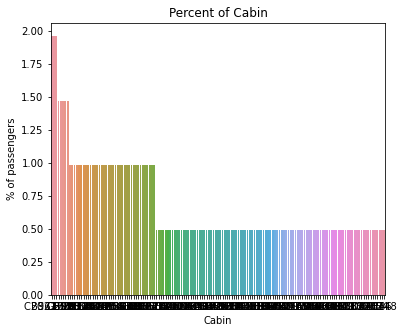

In [28]:
plt.figure(figsize = (6,5))
sns.barplot(x='Cabin', y='% of passengers', data= Cabin)
plt.title("Percent of Cabin")
plt.show()

**BarPlot for "Embarked" column**

In [29]:
Embarked = train_cat["Embarked"].value_counts(normalize=True)
Embarked = pd.DataFrame(Embarked)

Embarked = Embarked.reset_index()

## Fixing column names

Embarked = Embarked.rename(columns={"index":"Embarked", "Embarked":"% of passengers"})

Embarked["% of passengers"]= Embarked["% of passengers"]*100

Embarked["% of passengers"]= np.round(Embarked["% of passengers"],2)
display(Embarked)

,Embarked,% of passengers
0,S,72.44
1,C,18.90
2,Q,8.66


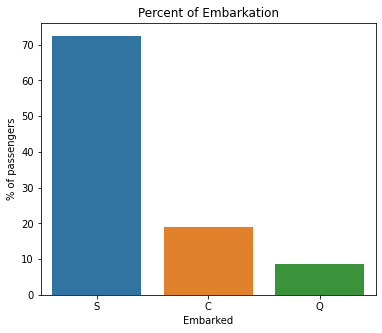

In [30]:
plt.figure(figsize = (6,5))
sns.barplot(x='Embarked', y='% of passengers', data= Embarked)
plt.title("Percent of Embarkation")
plt.show()

The graphs for Cabin and ticket columns are very cluttered. 

# Data preparation for ML model

In [31]:
train.isnull().values.any()

True

From above cell, it is confirmed that there are Null values in the dataset.

In [32]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

To predict the survival of passengers, all the columns are not needed. I'll drop those columns, for example, PassengerId.

In [33]:
train = train[['Survived','Pclass','Sex','Age','Fare']]
train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [34]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [37]:
test_x = test[['Pclass','Sex','Age','Fare']]

In [38]:
test_x.groupby('Sex')['Age'].mean()

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

**Filling missing values in "Age" column with mean values according to gender.**

In [39]:
train['Age']=train.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))

In [40]:
test_x['Age']=test_x.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))
test_x['Fare'].fillna(test_x['Fare'].mean(), inplace = True)

In [41]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [42]:
test_x.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

# Changing categorical columns to numerical 

In [43]:
le = LabelEncoder()

In [44]:
train['Sex'] = le.fit_transform(train.Sex)
train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [45]:
X = train[['Pclass','Sex','Age','Fare']]
y = train['Survived']

In [46]:
#test_x = test[['Pclass','Sex','Age','Fare']]

In [47]:
test_x['Sex'] = le.fit_transform(test_x.Sex)
test_x.head()

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875


In [48]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [49]:
X.shape

(891, 4)

In [50]:
#y.shape

# Spliting test train data

In [51]:
gender_sub_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_sub_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

y_train = train["Survived"]
y_test = gender_sub_data["Survived"]

In [54]:
#X_test.shape

In [55]:
sc = StandardScaler()
X = sc.fit_transform(X)
test_x = sc.fit_transform(test_x)

# Training model

In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y_train)

DecisionTreeClassifier()

In [57]:
y_pred = model.predict(test_x)

In [58]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, r2_score

In [59]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : ',RMSE) # RMSE : Root Mean Square Error

RMSE :  0.4482822077654243


# Accuracy on test data

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       266
           1       0.74      0.70      0.72       152

    accuracy                           0.80       418
   macro avg       0.78      0.78      0.78       418
weighted avg       0.80      0.80      0.80       418



In [61]:
#from sklearn.metrics import accuracy_score

#predictions_test = model.predict(test_x)
#accuracy_score(test_x, predictions_test)

# Accuracy on train data

In [62]:
#predictions_train = model.predict(X_train)
#accuracy_score(y_train,predictions_train)

**It is clear that the model has overfitted to the training data. There's a huge difference in accuracy on test data and train data.**

# Final Decision Tree

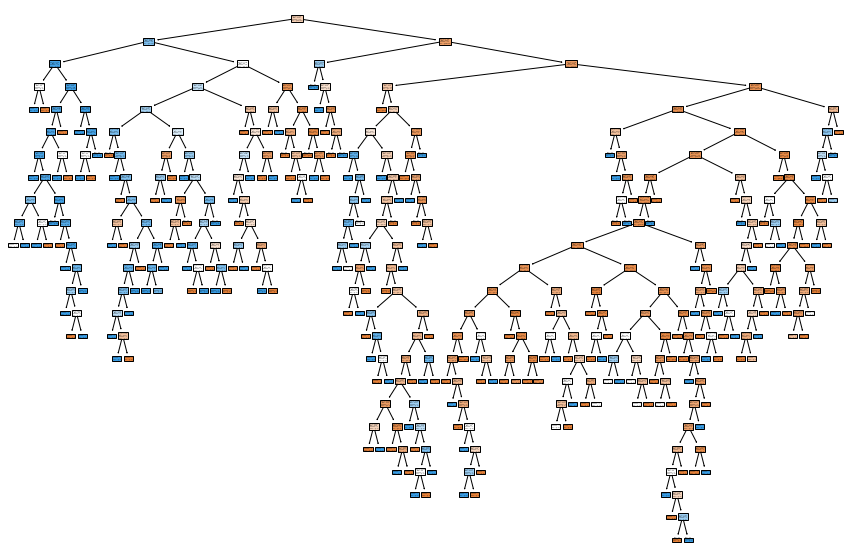

In [63]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [64]:
#y_pred = model.predict(X_test)
#y_pred.shape

In [65]:
#test.PassengerId.shape

In [66]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
final_data = {'PassengerId': test.PassengerId,"Survived": y_pred}
submission = pd.DataFrame(data=final_data)

submission.to_csv('submission.csv', index=False)

In [67]:
# I had help from a few places,
# https://www.kaggle.com/kenjee/titanic-project-example
# https://github.com/AnshulSaini17/Decision-Trees/blob/main/Decision_trees_implementation.ipynb
# https://www.kaggle.com/bartoszdorobek/titanic-desicion-tree-classifier